## Time Series Analysis of Tesla Stock Price

## Loading of Data

In [6]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [9]:
#loading the tesla stock data
df= pd.read_csv("TSLA.csv")

In [12]:
#displaying first few rows of the dataset
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/11/2019,18.901333,19.418667,18.700001,19.394667,19.394667,110884500.0
1,3/12/2019,19.099333,19.204666,18.737333,18.890667,18.890667,112561500.0
2,3/13/2019,18.926666,19.466000,18.846666,19.264000,19.264000,102670500.0
3,3/14/2019,19.496668,19.692667,19.219334,19.330667,19.330667,106551000.0
4,3/15/2019,18.900667,18.914667,18.293333,18.362000,18.362000,221782500.0


## Data Wrangling and processing of raw data

In [19]:
#converting the date column into datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [22]:
# Setting the 'Date' column as the index
df.set_index('Date', inplace=True)

In [25]:
# Filtering the data for the analysis period (01 May 2019 – 01 May 2023)
df_filtered = df.loc['2019-05-01':'2023-05-01']

In [27]:
df_filtered

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-01,15.923333,16.000000,15.433333,15.600667,15.600667,160566000.0
2019-05-02,16.368000,NaN,15.848000,16.273333,16.273333,272389500.0
2019-05-03,16.257334,17.107332,16.232668,NaN,17.002001,355602000.0
2019-05-06,16.667999,17.223333,16.566668,17.022667,17.022667,162508500.0
2019-05-07,17.120001,17.147333,16.340000,16.470667,16.470667,151971000.0
...,...,...,...,...,...,...
2023-04-25,159.820007,163.470001,158.750000,160.669998,160.669998,121999300.0
2023-04-26,160.289993,160.669998,153.139999,153.750000,153.750000,153364100.0
2023-04-27,152.639999,160.479996,152.369995,160.190002,160.190002,127015200.0


## Handling Missing Values

In [35]:
# Checking for missing values
print("\nMissing Values in Each Column:")
print(df_filtered.isnull().sum())


Missing Values in Each Column:
Open          6
High          9
Low           9
Close         8
Adj Close    14
Volume        4
dtype: int64


since missing values are present in the dataset we have to handle those missing values using linear interpolation

In [42]:
# handling missing values using linear interpolation
df_filtered.interpolate(method='linear', inplace=True)

# Confirming missing values are handled
print("\nMissing Values After Interpolation:")
print(df_filtered.isnull().sum())


Missing Values After Interpolation:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


/var/folders/cn/lkkp822n0s72nd1skbywc23c0000gn/T/ipykernel_17861/1829575705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.interpolate(method='linear', inplace=True)


Now that all columns have zero missing values, there is no need for further handling the missing data in this case.

## Calculating Statistics parameters for both Adjusted Closing Price and Returns

In [50]:
def compute_daily_returns(df):
   
    df['Return'] = df['Adj Close'].pct_change()  # Calculating daily percentage returns using the percentage change method on the adjusted closing price, capturing daily stock performance variations
    return df

# Apply the function to calculate returns on the cleaned dataset
df_filtered = compute_daily_returns(df_filtered)


def display_statistics(df):
    """
    Displays basic statistics for the adjusted closing price and daily returns.
    """
    print("\n=== Basic Statistical Analysis ===")
    
    # Adjusted Closing Price Statistics
    print("\nAdjusted Closing Price:")
    print(f"Mean: {df['Adj Close'].mean():.4f}")
    print(f"Variance: {df['Adj Close'].var():.4f}")
    print(f"Maximum: {df['Adj Close'].max():.4f}")
    print(f"Minimum: {df['Adj Close'].min():.4f}")
    
    # Daily Return Statistics
    print("\nDaily Returns:")
    print(f"Mean: {df['Return'].mean():.6f}")
    print(f"Variance: {df['Return'].var():.6f}")
    print(f"Maximum: {df['Return'].max():.6f}")
    print(f"Minimum: {df['Return'].min():.6f}")

# Call function to display statistics
display_statistics(df_filtered)



=== Basic Statistical Analysis ===

Adjusted Closing Price:
Mean: 171.9625
Variance: 11864.8761
Maximum: 409.9700
Minimum: 11.9313

Daily Returns:
Mean: 0.003239
Variance: 0.001830
Maximum: 0.198949
Minimum: -0.210628


/var/folders/cn/lkkp822n0s72nd1skbywc23c0000gn/T/ipykernel_17861/2858287295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Return'] = df['Adj Close'].pct_change()  # Calculating daily percentage returns using the percentage change method on the adjusted closing price, capturing daily stock performance variations


The stock has experienced significant price movements, going from $11.93 to $409.97, showing high volatility. The high variance further confirms that prices have fluctuated a lot over time.The high variance in returns indicates that this stock carries a higher risk

In [55]:
df_filtered

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2019-05-01,15.923333,16.000000,15.433333,15.600667,15.600667,160566000.0,NaN
2019-05-02,16.368000,16.553666,15.848000,16.273333,16.273333,272389500.0,0.043118
2019-05-03,16.257334,17.107332,16.232668,16.648000,17.002001,355602000.0,0.044777
2019-05-06,16.667999,17.223333,16.566668,17.022667,17.022667,162508500.0,0.001216
2019-05-07,17.120001,17.147333,16.340000,16.470667,16.470667,151971000.0,-0.032427
...,...,...,...,...,...,...,...
2023-04-25,159.820007,163.470001,158.750000,160.669998,160.669998,121999300.0,-0.011566
2023-04-26,160.289993,160.669998,153.139999,153.750000,153.750000,153364100.0,-0.043070
2023-04-27,152.639999,160.479996,152.369995,160.190002,160.190002,127015200.0,0.041886


## Visualising the necessary parameters

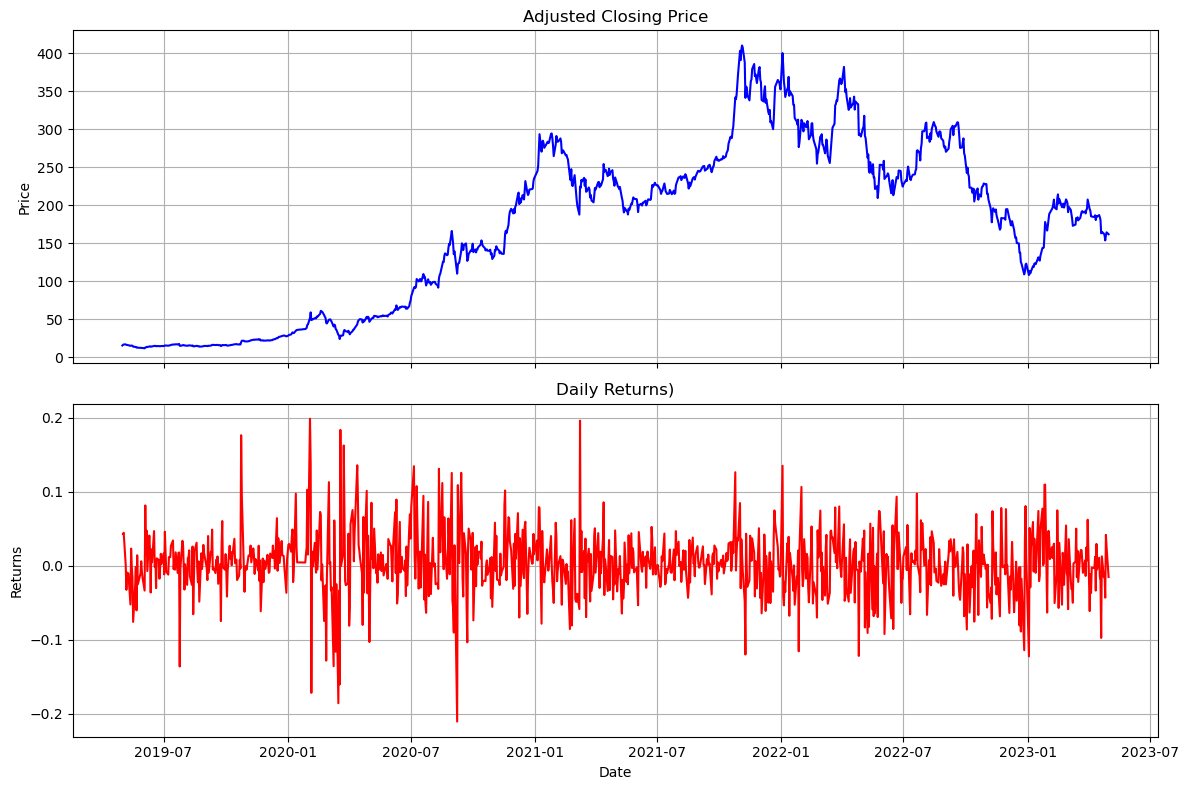

In [69]:
def plot_adjustedclosing_price_and_returns(data):
    """Plots adjusted closing price and daily returns on two subplots."""
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    # Plot Adjusted Closing Price
    axes[0].plot(data.index, data['Adj Close'], color='blue')
    axes[0].set_title('Adjusted Closing Price')
    axes[0].set_ylabel('Price')
    axes[0].grid(True)
    
    # Plot Returns
    axes[1].plot(data.index, data['Return'], color='red')
    axes[1].set_title('Daily Returns)')
    axes[1].set_ylabel('Returns')
    axes[1].set_xlabel('Date')
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

# Plot the adjusted closing price and returns using the cleaned dataset
plot_adjustedclosing_price_and_returns(df_filtered)

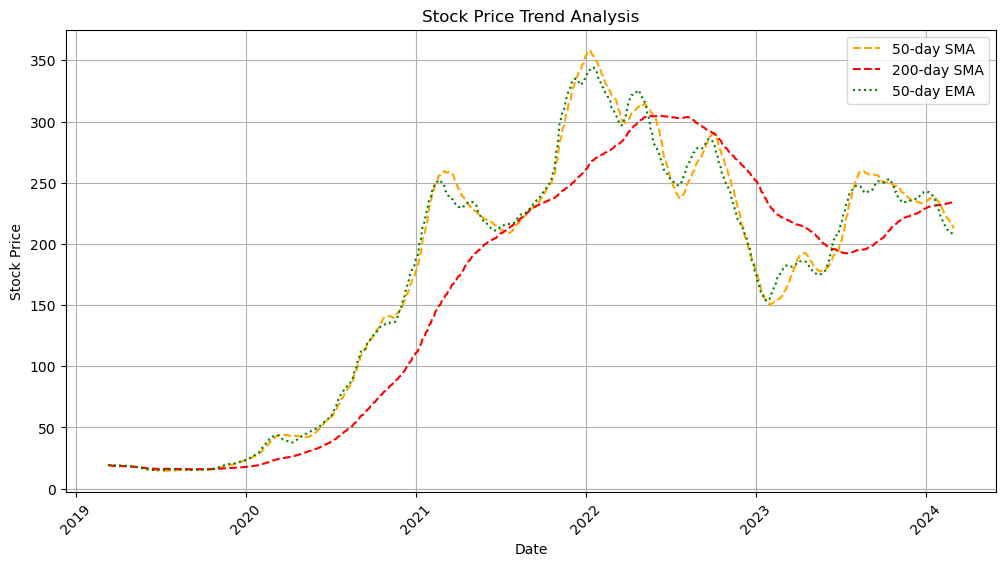

In [94]:


# Call the function to plot
def plot_stock_trend(data):
    """
    Function to analyze and visualize the stock price trend.
    - Plots the stock price.
    - Adds moving averages.
    - Fits a linear trendline.
    """
    
    plt.figure(figsize=(12, 6))

    

    # Moving Averages
    data['SMA_50'] = data['Adj Close'].rolling(window=50, min_periods=1).mean()
    data['SMA_200'] = data['Adj Close'].rolling(window=200, min_periods=1).mean()
    plt.plot(data.index, data['SMA_50'], label='50-day SMA', color='orange', linestyle='dashed')
    plt.plot(data.index, data['SMA_200'], label='200-day SMA', color='red', linestyle='dashed')

    # Exponential Moving Average (EMA)
    data['EMA_50'] = data['Adj Close'].ewm(span=50, adjust=False).mean()
    plt.plot(data.index, data['EMA_50'], label='50-day EMA', color='green', linestyle='dotted')

   
    # Formatting the chart
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title('Stock Price Trend Analysis')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    
    
# Run the function
plot_stock_trend(df)


## Exploaratory Data Analysis :ADF STATIONARITY TEST

In [100]:
#importing necessary libraries for modelling and prediction of future stock prices 
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [102]:
# Defining ADF stationarity test function
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','Number of Lags Used','Number of Observations Used']
    
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print('Reject H0. Data has no unit root')
    else:
        print("Can not reject H0, time series has a unit root, indicating it is non-stationary \n")

# Check stationarity of Adjusted Closing Price
print("Checking stationarity of Adjusted Closing Price:")
adf_check(df_filtered['Adj Close'])

Checking stationarity of Adjusted Closing Price:
Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.709645089495641
p-value : 0.42615001346870907
Number of Lags Used : 18
Number of Observations Used : 989
Can not reject H0, time series has a unit root, indicating it is non-stationary 



Model cannot forecast on non-stationary time series data.If the test p-value is greater than 0.05 than the data is non-stationary.Sice the p value is greater than 0.05 ,we need to differentiate it (e.g., by taking first-order differences).

In [110]:
# Function to check stationarity after differencing
def check_stationarity_firstdiff(data):
    """ 
    Performing the Augmented Dickey-Fuller (ADF) test on the first difference of the adjusted closing price.
    """

    # First-order differencing to stabilize mean and remove trend
    data['Adj Close Diff'] = data['Adj Close'].diff().dropna()

    # Perform the ADF test on the first difference
    adf_test = adfuller(data['Adj Close Diff'].dropna())

    # Extracting results
    test_statistic = adf_test[0]
    p_value = adf_test[1]
    used_lags = adf_test[2]
    observations = adf_test[3]

    # Print ADF test results
    print("ADF Test on First Difference:")
    print(f"Test Statistic: {test_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Number of Lags Used: {used_lags}")
    print(f"Number of Observations Used: {observations}")

    # Conclusion
    if p_value < 0.05:
        print("The series is stationary (p < 0.05).\n")
    else:
        print("The series is non-stationary (p >= 0.05).\n")

# Run the stationarity check on the first difference
check_stationarity_firstdiff(df_filtered)

ADF Test on First Difference:
Test Statistic: -7.0117
p-value: 0.0000
Number of Lags Used: 17
Number of Observations Used: 989
The series is stationary (p < 0.05).



/var/folders/cn/lkkp822n0s72nd1skbywc23c0000gn/T/ipykernel_17861/1254371230.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Adj Close Diff'] = data['Adj Close'].diff().dropna()


## ACF AND PACF ANALYSIS to determine order of p & q in ARIMA Model

They are used to analyze the time series data and determine the appropriate parameters for an ARIMA model. These functions help us understand how past stock prices influence future values.

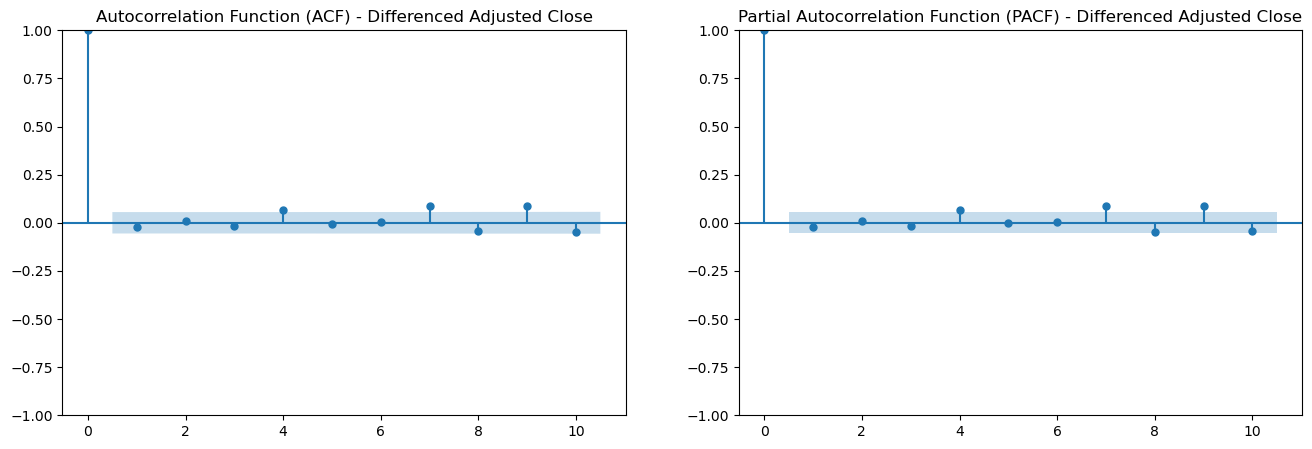

In [117]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Differencing the Adjusted Closing Price to remove trend
df['Differenced'] = df['Adj Close'].diff()

# Plot ACF and PACF for Differenced Data
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# ACF Plot
plot_acf(df["Differenced"].dropna(), ax=axes[0], lags=10)
axes[0].set_title("Autocorrelation Function (ACF) - Differenced Adjusted Close")

# PACF Plot
plot_pacf(df["Differenced"].dropna(), ax=axes[1], lags=10, method='ywm')
axes[1].set_title("Partial Autocorrelation Function (PACF) - Differenced Adjusted Close")

plt.show()

The ACF and PACF plots indicate significant spikes at lags 7 and 9, suggesting potential values for the AR (p) and MA (q) parameters. To identify the optimal ARIMA model, we will use a grid search approach, exploring combinations of p and q from 0 to 9, with d fixed at 1

## Predicting the future price of the stock using ARIMA time series model

In [124]:
#importing libraries necessary for arima time series model
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [127]:
def perform_arima_gridsearch(series_data, p_range, d, q_range):
    """Performs ARIMA grid search to find the best model based on AIC."""
    best_aic = float("inf")
    best_model = None
    best_order = None

    for p in p_range:
        for q in q_range:
            try:
                model = sm.tsa.ARIMA(series_data, order=(p, d, q)).fit()
                print(f"Trying ARIMA({p}, {d}, {q}): AIC = {model.aic}")
                if model.aic < best_aic:
                    best_aic = model.aic
                    best_model = model
                    best_order = (p, d, q)
            except Exception as e:
                print(f"ARIMA({p}, {d}, {q}) failed: {e}")

    print("\nBest ARIMA Model:", best_order)
    print(best_model.summary())
    return best_model
# Train-Test Split
train_size = int(len(df_filtered) * 0.8)
train, test = df_filtered['Adj Close'].iloc[:train_size], df_filtered['Adj Close'].iloc[train_size:]

# Perform Grid Search
d = 1
p_range = range(0, 10)
q_range = range(0, 10)

best_arima_model = perform_arima_gridsearch(train, p_range, d, q_range)

# Make Predictions
predictions = best_arima_model.forecast(steps=len(test))

# Evaluate Model
mse = mean_squared_error(test, predictions)
print("\nMean Squared Error (MSE):", mse) 

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

Trying ARIMA(0, 1, 0): AIC = 5649.36968791005
Trying ARIMA(0, 1, 1): AIC = 5649.945429305406
Trying ARIMA(0, 1, 2): AIC = 5651.928639009344
Trying ARIMA(0, 1, 3): AIC = 5653.631107078796
Trying ARIMA(0, 1, 4): AIC = 5655.323809187787


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

Trying ARIMA(0, 1, 5): AIC = 5656.684669266485


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(0, 1, 6): AIC = 5658.216204667757


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(0, 1, 7): AIC = 5644.406140438821


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(0, 1, 8): AIC = 5639.646269419391


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(0, 1, 9): AIC = 5640.004301629693
Trying ARIMA(1, 1, 0): AIC = 5649.963420066962
Trying ARIMA(1, 1, 1): AIC = 5651.936679814484


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

Trying ARIMA(1, 1, 2): AIC = 5653.908189800302


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Trying ARIMA(1, 1, 3): AIC = 5655.552837623628


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(1, 1, 4): AIC = 5653.164759385997


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(1, 1, 5): AIC = 5652.424385507948


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(1, 1, 6): AIC = 5645.827850612603


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(1, 1, 7): AIC = 5638.288841931162


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(1, 1, 8): AIC = 5640.041767438486


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(1, 1, 9): AIC = 5641.739454435937
Trying ARIMA(2, 1, 0): AIC = 5651.912415570995


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

Trying ARIMA(2, 1, 1): AIC = 5649.683175481379


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anacond

Trying ARIMA(2, 1, 2): AIC = 5639.599636972523


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(2, 1, 3): AIC = 5646.103524275326
Trying ARIMA(2, 1, 4): AIC = 5646.708197103783


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(2, 1, 5): AIC = 5640.247011056147


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(2, 1, 6): AIC = 5639.725295110902


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(2, 1, 7): AIC = 5639.139115245404


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(2, 1, 8): AIC = 5639.683243047404


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(2, 1, 9): AIC = 5629.755846889716
Trying ARIMA(3, 1, 0): AIC = 5653.694257996445


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

Trying ARIMA(3, 1, 1): AIC = 5655.52838721474


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Trying ARIMA(3, 1, 2): AIC = 5646.593278254816


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(3, 1, 3): AIC = 5646.294317640642


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(3, 1, 4): AIC = 5640.740106693103
Trying ARIMA(3, 1, 5): AIC = 5633.514592031787


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(3, 1, 6): AIC = 5633.572992616832


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(3, 1, 7): AIC = 5641.2639763540565


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(3, 1, 8): AIC = 5643.2241310935215


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anacond

Trying ARIMA(3, 1, 9): AIC = 5631.388626885828
Trying ARIMA(4, 1, 0): AIC = 5655.183091643617
Trying ARIMA(4, 1, 1): AIC = 5657.129278192075


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Trying ARIMA(4, 1, 2): AIC = 5638.156983417987


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Trying ARIMA(4, 1, 3): AIC = 5640.291751979655


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(4, 1, 4): AIC = 5645.717701099126


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(4, 1, 5): AIC = 5631.650044955178


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(4, 1, 6): AIC = 5635.421797741021


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(4, 1, 7): AIC = 5637.798123120686


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(4, 1, 8): AIC = 5640.338292398241


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(4, 1, 9): AIC = 5634.953077382185
Trying ARIMA(5, 1, 0): AIC = 5656.893320859398


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(5, 1, 1): AIC = 5658.786285978335


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Trying ARIMA(5, 1, 2): AIC = 5650.606636911631
Trying ARIMA(5, 1, 3): AIC = 5642.082451282849


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anacond

Trying ARIMA(5, 1, 4): AIC = 5634.124807266692


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(5, 1, 5): AIC = 5628.563457908562


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(5, 1, 6): AIC = 5637.650431083057


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(5, 1, 7): AIC = 5626.362856007962


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(5, 1, 8): AIC = 5634.989086637794


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(5, 1, 9): AIC = 5633.119376466593
Trying ARIMA(6, 1, 0): AIC = 5657.650550510205


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(6, 1, 1): AIC = 5643.170258148339


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(6, 1, 2): AIC = 5639.470678813155


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Trying ARIMA(6, 1, 3): AIC = 5631.958085266247


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(6, 1, 4): AIC = 5643.730476431387


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(6, 1, 5): AIC = 5630.621603778419


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(6, 1, 6): AIC = 5659.988993404326


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(6, 1, 7): AIC = 5640.825986480362


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(6, 1, 8): AIC = 5639.765228751987


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(6, 1, 9): AIC = 5660.91167639376
Trying ARIMA(7, 1, 0): AIC = 5648.017594734915


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(7, 1, 1): AIC = 5638.800294611361


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(7, 1, 2): AIC = 5639.888541461759


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Trying ARIMA(7, 1, 3): AIC = 5641.868525274282


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anacond

Trying ARIMA(7, 1, 4): AIC = 5638.581481205945


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(7, 1, 5): AIC = 5636.235334062043


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(7, 1, 6): AIC = 5634.344555187952


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(7, 1, 7): AIC = 5630.842792340866


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(7, 1, 8): AIC = 5626.231365780994


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(7, 1, 9): AIC = 5633.072741394942
Trying ARIMA(8, 1, 0): AIC = 5644.6025615822455


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(8, 1, 1): AIC = 5640.512742463908


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(8, 1, 2): AIC = 5642.752685530241


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Trying ARIMA(8, 1, 3): AIC = 5643.879873230411


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Trying ARIMA(8, 1, 4): AIC = 5632.222313737723


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(8, 1, 5): AIC = 5642.3657591483725


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(8, 1, 6): AIC = 5651.464182946284


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(8, 1, 7): AIC = 5630.159214525029


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(8, 1, 8): AIC = 5631.36919257089


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(8, 1, 9): AIC = 5632.271245665426
Trying ARIMA(9, 1, 0): AIC = 5641.306004466119


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(9, 1, 1): AIC = 5641.213771379584


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anacond

Trying ARIMA(9, 1, 2): AIC = 5630.678089322131


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(9, 1, 3): AIC = 5632.66987927396


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(9, 1, 4): AIC = 5634.366666128026


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(9, 1, 5): AIC = 5637.182307999461


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(9, 1, 6): AIC = 5636.306264746381


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(9, 1, 7): AIC = 5638.957691825819


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

Trying ARIMA(9, 1, 8): AIC = 5633.507925791315
Trying ARIMA(9, 1, 9): AIC = 5634.3655204346005

Best ARIMA Model: (7, 1, 8)
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  806
Model:                 ARIMA(7, 1, 8)   Log Likelihood               -2797.116
Date:                Wed, 12 Mar 2025   AIC                           5626.231
Time:                        01:58:24   BIC                           5701.285
Sample:                             0   HQIC                          5655.055
                                - 806                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6383      0.196     -3.258      0.001      -1.022      -0.254
ar.L2  

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## Predicting Future prices of Stock using best order of ARIMA(7, 1, 8)

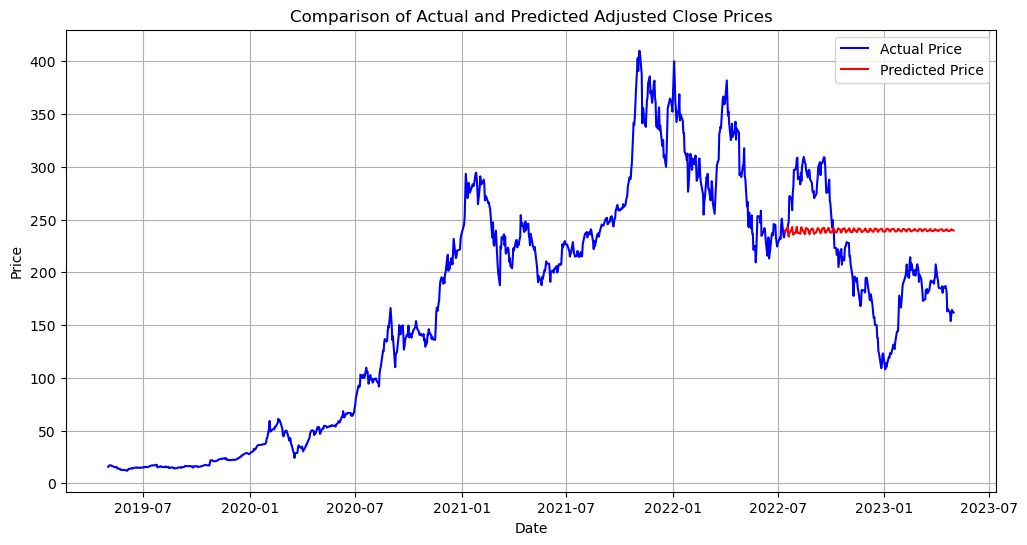

            Actual Price  Predicted Price
Date                                     
2022-07-13    237.039993       238.409675
2022-07-14    238.313339       239.887201


In [148]:
# Defining the train-test split ratio
split_ratio = 0.8
split_index = int(len(df_filtered) * split_ratio)

# Splitting data into training and testing sets
train_data = df_filtered.iloc[:split_index]
test_data = df_filtered.iloc[split_index:]

# Ensure predictions have the same index as the test data
predictions.index = test_data.index

# Create the plot
plt.figure(figsize=(12, 6))

# Plot actual adjusted closing prices
plt.plot(df_filtered.index, df_filtered['Adj Close'], color='blue', label='Actual Price')

# Plot predicted values only on the test data
plt.plot(test_data.index, predictions, color='red', label='Predicted Price')

# Chart labels and styling
plt.title('Comparison of Actual and Predicted Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Compare the actual and predicted values for the first test data point
result_df = pd.DataFrame({
    'Actual Price': test_data['Adj Close'],
    'Predicted Price': predictions
})

# Display only the first five instance in the test set
print(result_df.iloc[:2])


The predicted values for both the dates closely matches the actual values, which indicates that the ARIMA(7, 1, 8) model fits the data well and provides us the accurate forecasts.

# Predicting Volatility Of Tesla Stocks

## ARCH Model

To analyze whether or not the return series exhibits time-varying volatility.

In [159]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_arch

In [187]:
def test_arch_effect(data, num_lags=12):
    """
    Tests for ARCH effects in a return series to determine time-varying volatility.

    """
    # Remove missing values
    returns_series = data['Return'].dropna()

    # Fit a constant-only OLS model to remove mean effects
    model_ols = sm.OLS(returns_series, sm.add_constant(np.ones(len(returns_series)))).fit()

    # Extract residuals
    residuals = model_ols.resid

    # Perform ARCH LM test
    test_results = het_arch(residuals, maxlag=num_lags)

    # Print results in a formatted manner
    print("\n ARCH Effect Test Results:")
    print(f" LM Statistic: {test_results[0]:.4f}")
    print(f" p-value: {test_results[1]:.4f}")
    print(f" F-statistic: {test_results[2]:.4f}")
    print(f" F p-value: {test_results[3]:.4f}")

    # Interpret results
    if test_results[1] < 0.05:
        print("\n Significant ARCH effects detected (p < 0.05).")
        print("GARCH modeling is needed. \n")
    else:
        print("\n No significant ARCH effects detected (p ≥ 0.05).")
        print("GARCH modeling may not be necessary.\n")

    return {
        "LM Statistic": test_results[0],
        "p-value": test_results[1],
        "F-statistic": test_results[2],
        "F p-value": test_results[3]
    }

# Execute the ARCH effect test
arch_results = test_arch_effect(df_filtered, num_lags=12)


 ARCH Effect Test Results:
 LM Statistic: 66.3720
 p-value: 0.0000
 F-statistic: 5.8489
 F p-value: 0.0000

 Significant ARCH effects detected (p < 0.05).
GARCH modeling is needed. 



/var/folders/cn/lkkp822n0s72nd1skbywc23c0000gn/T/ipykernel_17861/857298519.py:16: FutureWarning: the 'maxlag' keyword is deprecated, use 'nlags' instead.
  test_results = het_arch(residuals, maxlag=num_lags)


Since the p-value (0.0000) is less than 0.05, we reject the null hypothesis,which confirms the presence of notable amount of ARCH effect in the data. This indicates that volatility is time-dependent.Ignoring ARCH effects can lead to inefficient risk modeling,Therefore it is necessary for us to conduct GARCH for accurate volatility forecasting

## Garch Modelling

## Predicting order for GARCH

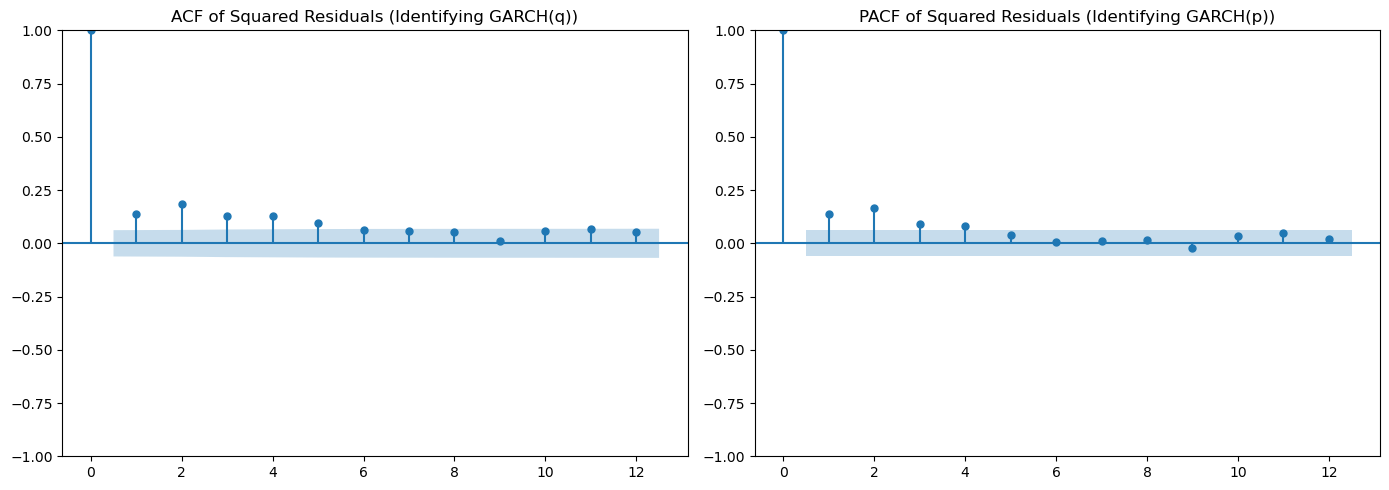


 **ADF Test for Squared Residuals**:
Test Statistic: -11.8118
p-value: 0.0000
Critical Values: {'1%': -3.436886505235454, '5%': -2.8644259034265493, '10%': -2.568306590825728}
 Squared residuals are stationary (p < 0.05). Proceed with GARCH modeling.


In [211]:
def garch_order_selection(residuals, max_lags=12):
    """
    Determines the optimal GARCH(p, q) order by analyzing the ACF & PACF of squared residuals.
    """

    if residuals.isnull().any():
        raise ValueError("Error: Residuals contain NaN values. Please ensure they are properly computed.")

    # Compute squared residuals
    squared_residuals = np.square(residuals)

    # Create ACF & PACF plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

    # ACF (Used for selecting GARCH(q))
    plot_acf(squared_residuals, ax=axes[0], lags=max_lags)
    axes[0].set_title("ACF of Squared Residuals (Identifying GARCH(q))")

    # PACF (Used for selecting GARCH(p))
    plot_pacf(squared_residuals, ax=axes[1], lags=max_lags, method='ywm')
    axes[1].set_title("PACF of Squared Residuals (Identifying GARCH(p))")

    plt.tight_layout()
    plt.show()

    # Check stationarity of squared residuals using ADF test
    adf_test = adfuller(squared_residuals)
    print("\n **ADF Test for Squared Residuals**:")
    print(f"Test Statistic: {adf_test[0]:.4f}")
    print(f"p-value: {adf_test[1]:.4f}")
    print(f"Critical Values: {adf_test[4]}")
    
    if adf_test[1] < 0.05:
        print(" Squared residuals are stationary (p < 0.05). Proceed with GARCH modeling.")
    else:
        print(" Squared residuals are non-stationary (p ≥ 0.05). Differencing required.")



# Run GARCH order selection
garch_order_selection(arch_residuals)


ACF and PACF analysis indicated spikes at lag 2, which suggest that potentially p=2 and q=2 for the GARCH model on the basis of the acf and pacf graphs.

## Fitting GARCH Model

/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001828. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                1801.17
Distribution:                  Normal   AIC:                          -3592.33
Method:            Maximum Likelihood   BIC:                          -3567.76
                                        No. Observations:                 1007
Date:                Wed, Mar 12 2025   Df Residuals:                     1007
Time:                        02:47:11   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.8281e-04  1.523e-04      1.200      0.230 

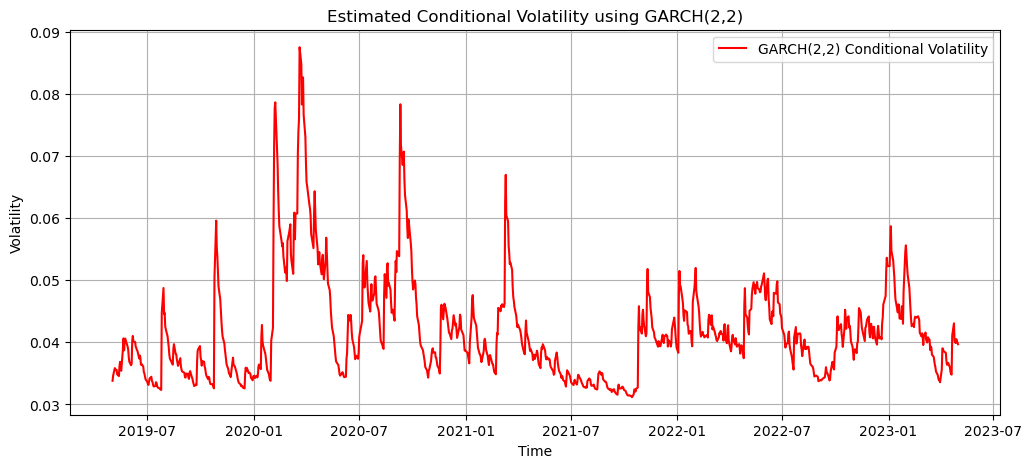

In [223]:
from arch import arch_model

# Ensure residuals are clean
residuals = arch_residuals.dropna()

# Fit GARCH(2,2) model
garch_model = arch_model(residuals, vol='Garch', p=2, q=2, mean='Zero', dist='normal')
garch_fit = garch_model.fit(disp="off")  # Fit the model

# Print model summary
print(garch_fit.summary())

# Extract conditional volatility (variance)
garch_volatility = garch_fit.conditional_volatility

# Plot conditional volatility
plt.figure(figsize=(12, 5))
plt.plot(garch_volatility, label="GARCH(2,2) Conditional Volatility", color='red')
plt.title("Estimated Conditional Volatility using GARCH(2,2)")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.show()


## Applying gridsearch to reach to the best model for GARCH

### Optimising the model 

In [245]:
import itertools

"""
Train-Test Split and Fit the Best GARCH Model (from Grid Search)
Performs a 90-10 train-test split.
"""

# Drop rows with NaN or infinite values
residuals = residuals.replace([np.inf, -np.inf], np.nan).dropna()

# Split data: 90% train, 10% test
train_size = int(len(residuals) * 0.9)
train, test = residuals[:train_size], residuals[train_size + 1:]

# Grid search for GARCH(p, q) with p and q in range(0, 3)
p_range = range(0, 3)
q_range = range(0, 3)

best_aic = np.inf
best_model = None
best_params = (0, 0)

for p, q in itertools.product(p_range, q_range):
    try:
        model = arch_model(train, vol='Garch', p=p, q=q)
        model_fit = model.fit(disp='off')

        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_model = model_fit
            best_params = (p, q)

        print(f'Tested GARCH({p},{q}) - AIC: {model_fit.aic:.4f}')

    except Exception as e:
        print(f'Error fitting GARCH({p},{q}): {e}')

print(f'Best GARCH Model: GARCH({best_params[0]},{best_params[1]}) with AIC: {best_aic:.4f}')
print(best_model.summary())

Error fitting GARCH(0,0): One of p or o must be strictly positive
Error fitting GARCH(0,1): One of p or o must be strictly positive
Error fitting GARCH(0,2): One of p or o must be strictly positive
Tested GARCH(1,0) - AIC: -3158.7857
Tested GARCH(1,1) - AIC: -3240.1113
Tested GARCH(1,2) - AIC: -3230.7434
Tested GARCH(2,0) - AIC: -3206.4286


/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001824. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001824. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataS

Tested GARCH(2,1) - AIC: -3242.0149
Tested GARCH(2,2) - AIC: -3246.8397
Best GARCH Model: GARCH(2,2) with AIC: -3246.8397
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1629.42
Distribution:                  Normal   AIC:                          -3246.84
Method:            Maximum Likelihood   BIC:                          -3217.99
                                        No. Observations:                  906
Date:                Wed, Mar 12 2025   Df Residuals:                      905
Time:                        02:56:04   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------

/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001824. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


As we can see the best model selection is (2,2) for GARCH as it has lowest AIC.We can say that above graphs of ACF and PACF represented the correct values.

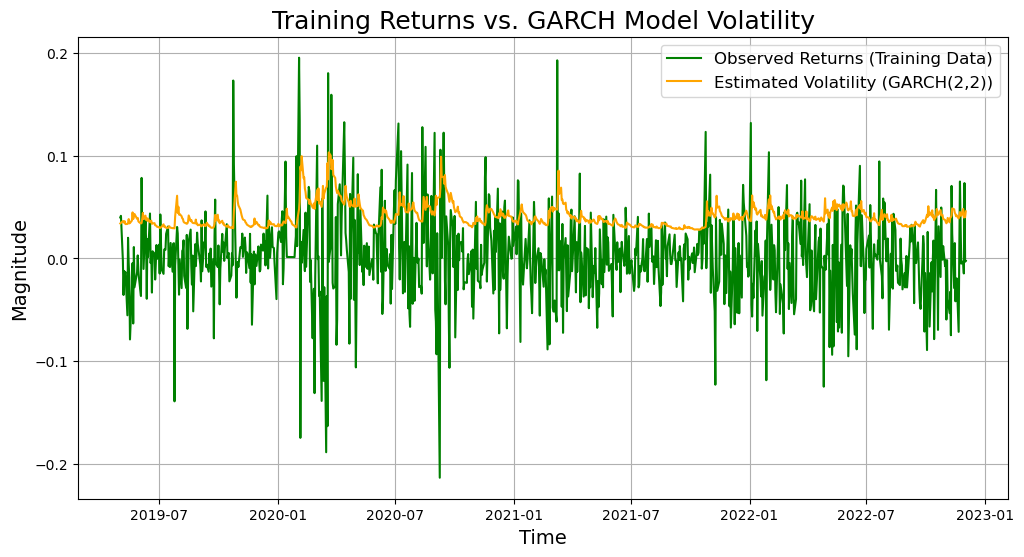

In [257]:
# Extract conditional volatility from the selected GARCH model
optimal_garch_vol = best_model.conditional_volatility

# Create a figure for plotting
plt.figure(figsize=(12, 6))

# Plot training returns
plt.plot(train, color='green', label='Observed Returns (Training Data)')

# Plot GARCH volatility estimate
plt.plot(optimal_garch_vol, color='orange', label=f'Estimated Volatility (GARCH({best_params[0]},{best_params[1]}))')

# Formatting the plot
plt.title('Training Returns vs. GARCH Model Volatility', fontsize=18)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Magnitude', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Display the plot
plt.show()


## Predicting Future Volatility Using the Best GARCH Model

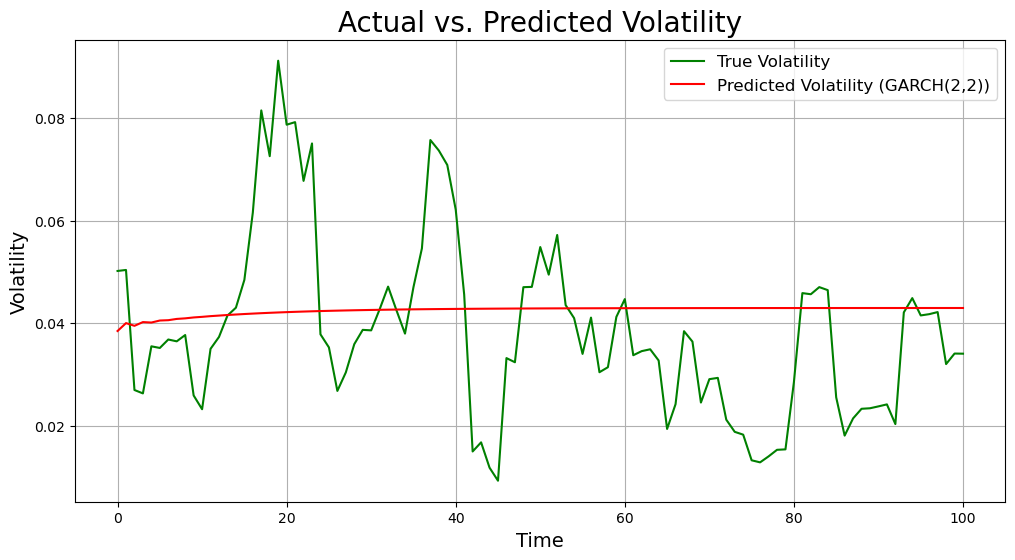

In [270]:
# Ensure test_size aligns with dataset
test_size = len(residuals) - train_size

# Forecasting future volatility using the best GARCH model
best_predictions = best_model.forecast(horizon=test_size)

# Extracting predicted volatility (standard deviation)
predicted_volatility = np.sqrt(best_predictions.variance.values[-1, :])

if 'Volatility' not in df_filtered.columns:
    df_filtered['Volatility'] = residuals.rolling(window=5).std()

true_volatility = df_filtered['Volatility'].iloc[-test_size:]

if len(predicted_volatility) != len(true_volatility):
    predicted_volatility = predicted_volatility[:len(true_volatility)]

plt.figure(figsize=(12, 6))
plt.plot(true_volatility.values, label='True Volatility', color='green')
plt.plot(predicted_volatility, label=f'Predicted Volatility (GARCH({best_params[0]},{best_params[1]}))', color='red')

plt.title('Actual vs. Predicted Volatility', fontsize=20)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Volatility', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [277]:
# Creating a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual Volatility': true_volatility.values,
    'Predicted Volatility': predicted_volatility
})

# Display the first 10 rows for comparison
print(comparison_df.head(10))

   Actual Volatility  Predicted Volatility
0           0.050173              0.038454
1           0.050368              0.039995
2           0.026940              0.039466
3           0.026275              0.040195
4           0.035467              0.040105
5           0.035145              0.040499
6           0.036794              0.040564
7           0.036438              0.040812
8           0.037667              0.040923
9           0.025876              0.041100


The GARCH(2,2) model provides a good volatility estimate but it is slightly underestimating sharp volatility spikes.

## REPORT: Time Series Modelling of Tesla Stock data


1)Tesla Adjusted Closing Price:Tesla’s stock price grew fast, hit a peak, and then dropped due to economic factors.
2)Tesla Daily Log Returns :This graph shows how much Tesla’s stock price changed each day.More spikes means strong price fluctuations which directly indicates to the high volatility.

3)ADF Test(Augmented Dickey–Fuller test (ADF):We have performed the ADF test to check stationarity of tesla stock data.Stationarity is a very important factor in time series because a model cannot forecast on non-stationary time series data.if the test p-value is greater than 0.05, the data is non-stationary, meaning we need to differentiate it (e.g., by taking first-order differences).If the p-value is below 0.05, the data is already stationary.As we can see the p value is greater than 0.05 which indicated that the data is non stationary,Therefore we need to differentiate the dataset Since the ADF test statistic in the differentiated dataset (-6.703) is lower than the critical values (-3.435, -2.863, -2.568), and the p-value (3.84e-09) is significantly below 0.05, we reject the null hypothesis. This means the differenced stock price data is now stationary, making it suitable for time series modeling.

4)ACF PACF ANALYSIS FOR ARIMA ORDER SELECTION: The ACF and PACF plots indicate significant spikes at lags 7 and 9, suggesting potential values for the AR (p) and MA (q) parameters. To identify the optimal ARIMA model, we used a grid search approach, exploring combinations of p and q from 0 to 9, with d fixed at 1.The best model came out to be (7,1,8).The predicted values for both the dates closely matches the actual values, which indicates that the ARIMA(7, 1, 8) model fits the data well and provided us with the accurate forecasts.

5)During the volatility analysis significant arch was detected due to which we performed the Garch modelling to predict the volatility of stocks.The best model selection is (2,2) for GARCH as it has lowest AIC.We can see from the results the model performed well as the difference between actual and predicted values is less .

Limitations:ARIMA failed to capture non-linearity in stock price movements.Alternative models like LSTM (Long Short-Term Memory) networks can improve accuracy.GARCH assumes constant mean and variance in the residuals which results in the underestimating of the volatility.More advanced models such as EGARCH (Exponential GARCH) or Stochastic Volatility Models can be used further to improve the accuracy

Conclusion:
ARIMA and GARCH models work well for short-term predictions, but over time, their forecasts tend to flatten out and become less useful. This is a common limitation because they rely on past patterns and struggle to adapt to sudden market changes. To improve long-term predictions, we can use hybrid models like ARIMA-LSTM or GARCH-LSTM, which combine traditional statistical methods with deep learning to capture both historical trends and complex patterns in the data.

References: week 16 lab
week 17,20 lab and lecture notes,
Nielsen, Aileen. Practical time series analysis: Prediction with statistics and machine learning. O'Reilly Media, 2019,Introduction to Time Series Analysis and Forecasting Douglas C. Montgomery, Chery